# Ceneo Analyzer

1. Wyświetlenie listy kodów produktów o których zostały pobrane opinie
2. Pobranie od użytkownika kodu produktu którego statystyki mają być policzone
3. Wczytanie z pliku JSON opinii o produkcie którego statystyki mają być policzone
4. Policzenie podstawowych statystyk
5. Przygotowanie wykresów
    - Histogram częstości ocen produktu
    - Wykres udziału rekomendacji w opiniach

1. Import bibliotek

In [8]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

2. Wyświetlenie listy kodów produktów o których zostały pobrane opinie

In [6]:
print(*[filename.split(".")[0] for filename in os.listdir('opinions')], sep="\n")

108481121
114228736
28020568


3. Pobranie od użytkownika kodu produktu którego statystyki mają być policzone

In [21]:
product_code = input("Podaj kod produktu z Ceneo.pl: ")

4. Wczytanie z pliku JSON opinii o produkcie którego statystyki mają być policzone

In [22]:
opinions = pd.read_json(f"opinions/{product_code}.json")
opinions.stars = opinions.stars.apply(lambda s: s.split('/')[0].replace(',', '.')).astype(float)

5. Policzenie podstawowych statystyk

In [23]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
average_stars

4.611111111111111

6. Histogram częstości ocen produktu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

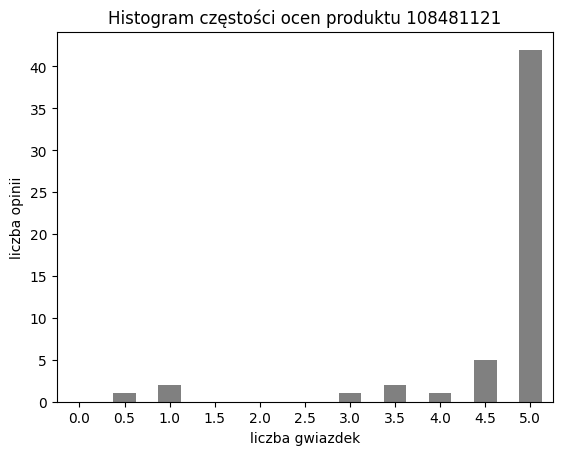

In [28]:
stars_distr = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
stars_distr.plot.bar(color='gray')
plt.title(f"Histogram częstości ocen produktu {product_code}")
plt.xlabel("liczba gwiazdek")
plt.ylabel("liczba opinii")
plt.xticks(rotation=0)

7. Wykres udziału rekomendacji w opiniach

In [16]:
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,post_date,purchase_date,useful,useless
0,16878793,a...l,None,3.5,Raz już pisałem opinię i to niezbyt pochlebną...,"[ekonomia wydruków, jakość wydruków, jakość wy...","[brak schchowka, design z xx wieku, estetyczna...",2022-12-14 14:19:39,2022-11-22 18:59:15,1,0
1,16823718,a...l,None,3.5,Byłem przez kilkanaście lat przyzwyczajony do ...,"[ekonomia wydruków, jakość wydruków, jakość wy...","[design z xx wieku, estetyczna obudowa, głośno...",2022-12-02 12:31:42,2022-11-23 11:04:52,1,0
2,15107919,m...c,None,3.5,"Dobra jakość wydruków, cicha praca no i oczywi...","[ekonomia wydruków, głośność pracy, jakość wyd...","[design z xx wieku, obudowa bez pomysłu]",2021-10-21 10:53:37,2021-10-12 13:28:35,4,3
3,17189344,t...a,Polecam,5.0,Szukałem drukarki do drukowania zdjęć. Już był...,"[ekonomia wydruków, estetyczna obudowa, głośno...",[],2023-02-24 13:40:37,2023-02-13 19:25:41,1,0
4,15421981,i...a,Polecam,5.0,Uważam że jest warta swojej ceny a że mam ją k...,"[ekonomia wydruków, głośność pracy, jakość wyd...",[],2021-12-24 13:33:57,2021-12-17 10:49:10,1,1
5,18245613,o...a,Polecam,4.5,"Na razie wszystko wygląda dobrze, ale wydaje m...","[jakość wydruków, jakość wydruku, wydajność]",[szybkość wydruku],2023-12-27 09:08:11,2023-12-23 17:00:48,0,0
6,18226486,r...g,Polecam,5.0,Drukarka Epson EcoTank L 3256 świetnie radzi s...,[],[],2023-12-19 20:40:45,2023-11-20 23:35:15,0,0
7,18020976,s...k,Polecam,4.5,"jestem świeżym użytkownikiem, ale jak dotąd ni...","[jakość wydruków, jakość wydruku, szybkość wyd...",[],2023-10-20 09:30:30,2023-10-11 12:27:29,0,0
8,16517800,c...1,Polecam,5.0,"łatwa konfiguracja prze smartfona , dodatkowy ...","[ekonomia wydruków, estetyczna obudowa, głośno...",[],2022-09-13 23:13:27,2022-09-08 18:45:53,0,0
9,17794966,n...9,Polecam,5.0,"Krótko używam, ale sam Montaz i pierwsze wydru...",[wifi],[],2023-08-11 09:31:42,2023-08-02 15:25:59,0,0
